<a href="https://colab.research.google.com/github/izharrr99/izharrr99/blob/main/Celebrity%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Enter your path of dataset from google drive  
import scipy.io as sio
GOOGLE_COLAB = True
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/"

dataset = path + "data.mat" 

#Enter path of your test image
me=path +'Izhar.jpg'
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
(50, 3072)


In [ ]:
import numpy as np 
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

0


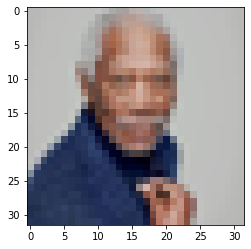

35


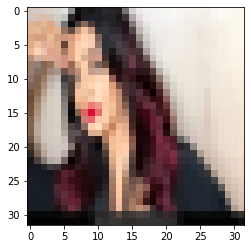

In [ ]:
from matplotlib import pyplot as plt
import cv2
xx = range(1) #Enter number of celebrities you want to see. Max = 50 in data.
for i in xx:
 a= im[:,:,:,i]
 print(i)
 plt.imshow(a)
 plt.show()
 a.shape

 #Enter index of celebrity you want to see
 i = 35
 a= im[:,:,:,i]
 print(i)
 plt.imshow(a)
 plt.show()
 a.shape

Original Image


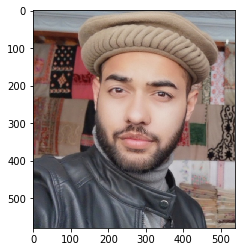

Dimensions of original image:  (580, 538, 3)

Resized Image


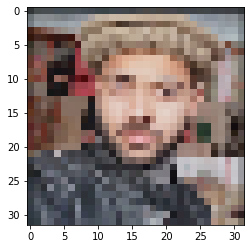

Dimensions of resized image:  (32, 32, 3)
My image:  [345215]
Index image:  [430209, 143897, 299177, 396286, 209264, 566962, 194970, 169601, 358029, 300944, 399045, 326794, 321075, 303874, 294643, 377177, 445785, 368677, 409622, 326924, 227868, 434059, 217187, 272039, 531130, 484804, 410985, 402513, 242697, 297984, 434670, 171491, 397349, 424536, 204997, 397524, 582303, 241468, 337130, 217791, 480187, 241333, 280730, 264886, 416840, 126562, 322452, 379735, 350724, 285969]
Eucleadian distance:  [array([84994]), array([201318]), array([46038]), array([51071]), array([135951]), array([221747]), array([150245]), array([175614]), array([12814]), array([44271]), array([53830]), array([18421]), array([24140]), array([41341]), array([50572]), array([31962]), array([100570]), array([23462]), array([64407]), array([18291]), array([117347]), array([88844]), array([128028]), array([73176]), array([185915]), array([139589]), array([65770]), array([57298]), array([102518]), array([47231]), array([89

In [ ]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray
from scipy import ndimage

    #Read your image here
picture=plt.imread(me)
print("Original Image")
plt.imshow(picture)
plt.show()
print("Dimensions of original image: ", picture.shape)
    #Resize your image
resized = ndimage.zoom(picture,[32/580,32/538,1])
print("\nResized Image")
plt.imshow(resized)
plt.show()
print("Dimensions of resized image: ", resized.shape)
    #Reshape your image as we reshape the image of dataset
res = resized[:,:,:]
res = np.reshape(res,[-1], order="A")
list1 = []
list1.append(np.sum((res),dtype=int))


    #Calculate Eucleadian distance between your image and dataset 
edis = []
list2 = []
for i in range(50):
    p1 = im[:,:,:,i]
    p1 = np.reshape(p1,[-1], order="A")
    list2.append(np.sum((p1),dtype=int))
    
print("My image: ",list1)
print("Index image: ", list2)
ff = list2 - list1
edis = [x - list1 for x in list2]
edis =  [abs(bb) for bb in edis] 

print("Eucleadian distance: ",edis)

Minimum distance:  [5509]
Image index corresponding to min distance:  48
Best match is : 


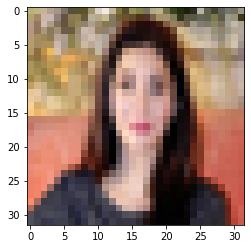

Dimensions of image:  (32, 32, 3)


In [ ]:
# Write code for 1 NN
#Find min distance
#Find at which point min value exists
sortt = sorted(edis)
print("Minimum distance: ",sortt[0])
NN1 = edis.index(sortt[0])
print("Image index corresponding to min distance: ", NN1)
bestmatch = im[:,:,:,NN1]
print("Best match is : ")
plt.imshow(bestmatch)
plt.show()
print("Dimensions of image: ", bestmatch.shape)

1 : Minimum distance:  [5509]
Index :  48


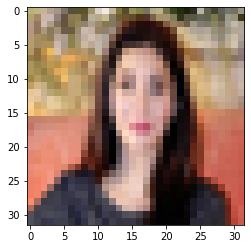

2 : Minimum distance:  [8085]
Index :  38


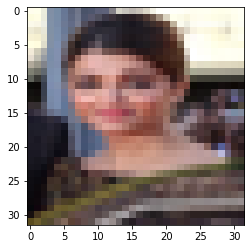

3 : Minimum distance:  [12814]
Index :  8


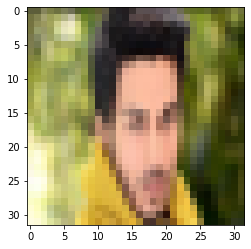

In [ ]:
#3 NN
#Write code for 3 NN
#Find 3 min distances
#Find their instances
#hint: Use for Loop

def matches(k):
   for i in range(k):
      print(i+1,": Minimum distance: ", sortt[i])
      ins = edis.index(sortt[i])      
      print("Index : ", ins)
      pp = im[:,:,:,ins]
      plt.imshow(pp)
      plt.show() 
   else:
     print()

matches(3)
  

1 : Minimum distance:  [5509]
Index :  48


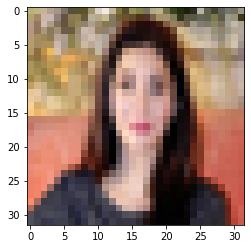

2 : Minimum distance:  [8085]
Index :  38


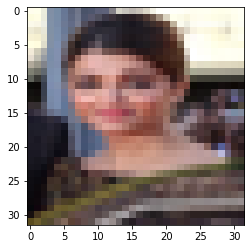

3 : Minimum distance:  [12814]
Index :  8


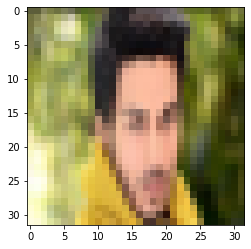

4 : Minimum distance:  [18291]
Index :  19


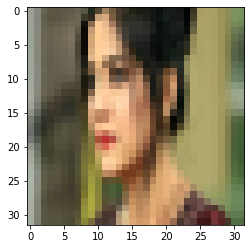

5 : Minimum distance:  [18421]
Index :  11


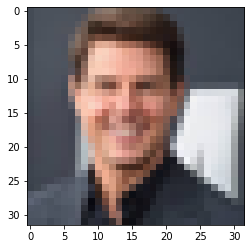

In [ ]:
#Write code for 5 NN
#Find 5 min distances
#Find their instances
#hint: Use for Loop
matches(5)